In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.stats import zscore
import statsmodels.api as sm
import warnings
import os

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)

In [3]:
os.chdir('C:/Users/Ryo/OneDrive/Desktop/Master Thesis/study/study2')

In [4]:
df = pd.read_excel('raw/Study2_May_28_2024_10_46_final.xlsx')
df

,ResponseId,Ads_OP_1,Ads_OP_2,Ads_OP_3,Ads_OP_4,Ads_OP_5,Ads_OP_6,Ads_CO_1,Ads_CO_2,Ads_CO_3,Ads_CO_4,Ads_CO_5,Ads_CO_6,Ads_EX_1,Ads_EX_2,Ads_EX_3,Ads_EX_4,Ads_EX_5,Ads_EX_6,Ads_AG_1,Ads_AG_2,Ads_AG_3,Ads_AG_4,Ads_AG_5,Ads_AG_6,Cha_OP_1,Cha_OP_2,Cha_OP_3,Cha_OP_4,Cha_OP_5,Cha_OP_6,Cha_OP_7,Cha_CO_1,Cha_CO_2,Cha_CO_3,Cha_CO_4,Cha_CO_5,Cha_CO_6,Cha_CO_7,Cha_EX_1,Cha_EX_2,Cha_EX_3,Cha_EX_4,Cha_EX_5,Cha_EX_6,Cha_EX_7,Cha_AG_1,Cha_AG_2,Cha_AG_3,Cha_AG_4,Cha_AG_5,Cha_AG_6,Cha_AG_7,big5_1,big5_2,big5_3,big5_4,big5_5,big5_6,big5_7,big5_8,big5_9,big5_10,big5_11,big5_12,big5_13,big5_14,big5_15,big5_16,big5_17,big5_18,big5_19,big5_20,big5_21,big5_22,big5_23,big5_24,big5_25,big5_26,big5_27,big5_28,big5_29,big5_30,gender,age,education,race,employment,income
0,5e49c48fac17f4000c1bfcbc,50,54,50,50,58,51,42,54,61,61.0,64,67,18,50.0,23,21,15,8,58,50,65,61,52,55,65,74.0,88,85,58,59,59,75,60,76,80,81,79,58,60.0,62.0,59,62,66,73,60,71,72,80,80,82,83,79,4,4,3,5,4,2,2,3,3,2,3,2,5,3.0,3,2,3,3,2,3,4,4,4,3,5,4,3,3,4,2,2,43,5,1,6,10
1,5f38251e3cec500d267efb92,20,15,30,25,30,15,75,80,79,90.0,77,85,80,85.0,97,89,82,100,73,73,83,71,74,90,95,84.0,100,100,100,90,100,88,98,97,91,97,86,86,86.0,88.0,100,100,96,100,80,98,100,97,97,100,95,94,4,4,2,3,2,4,2,2,2,1,3,4,4,4.0,4,3,2,3,4,3,2,4,4,4,5,1,3,2,2,2,1,22,4,1,2,1
2,5cd043b25b04850017e5d028,1,13,10,11,6,6,50,50,39,NaN,50,50,3,4.0,3,2,4,4,89,93,98,100,100,100,70,70.0,76,81,89,88,51,82,78,85,86,87,83,85,NaN,50.0,50,50,50,50,50,84,92,93,94,89,99,97,4,4,2,3,2,2,1,1,2,3,3,4,4,4.0,4,3,1,4,5,3,2,5,5,5,5,2,1,1,2,3,2,58,2,1,7,10
3,63d37e4ea0985c4dc486ff8e,60,40,60,60,70,70,40,40,40,30.0,30,30,70,70.0,80,80,80,80,40,20,20,20,40,30,60,71.0,80,71,90,80,75,84,82,83,86,80,82,80,75.0,79.0,71,77,77,78,76,90,85,84,91,91,87,94,4,4,3,5,4,2,4,3,5,4,2,1,4,2.0,4,3,5,4,3,2,4,4,4,4,4,2,5,4,4,2,1,32,4,1,2,2
4,6565fff05ec125a5ff77a77c,50,50,50,50,50,50,70,50,70,50.0,50,50,0,0.0,0,0,0,0,50,50,50,50,50,50,70,60.0,70,100,60,60,60,70,60,60,70,60,60,60,70.0,60.0,60,70,60,60,60,70,60,60,70,60,60,60,3,5,4,4,5,1,3,4,4,1,3,3,2,NaN,4,3,1,3,3,1,3,5,2,2,5,4,4,2,3,1,1,25,2,1,1,5
5,6146eadbe88132805e5e3139,20,20,20,20,20,20,11,11,11,11.0,12,12,80,78.0,68,29,77,68,29,28,28,13,14,28,79,77.0,82,82,81,83,84,83,85,84,82,82,82,84,86.0,85.0,89,89,85,83,86,81,83,84,84,86,70,82,2,3,2,2,1,4,1,2,1,1,3,4,5,3.0,3,4,1,4,4,2,2,5,4,3,4,4,2,2,2,2,2,32,2,1,7,9
6,5b987c55bb32a600018302dc,71,41,93,94,91,92,60,69,44,65.0,58,71,42,NaN,54,70,64,73,40,32,34,21,26,23,71,NaN,73,55,82,21,60,62,50,64,79,86,50,70,61.0,NaN,69,73,92,54,73,66,53,87,88,93,58,75,3,5,5,4,4,2,1,5,4,2,2,4,2,3.0,5,4,1,2,3,2,4,5,3,3,5,5,3,4,3,1,2,38,5,1,7,5
7,5f00b44e836b900755d6da5c,70,50,80,65,70,70,50,40,50,50.0,45,40,50,50.0,40,40,40,30,40,40,30,30,30,25,40,39.0,31,35,33,29,29,40,40,26,30,29,30,32,35.0,33.0,32,30,29,29,29,35,29,30,32,31,31,30,2,3,1,1,5,3,4,2,1,1,4,3,5,5.0,5,3,2,4,5,1,3,4,4,5,4,1,3,1,1,1,1,54,5,1,7,8
8,60f5569b3a95a18a91dc5d21,30,47,59,65,60,29,19,57,30,29.0,16,12,19,41.0,18,36,8,7,81,23,75,73,69,74,70,78.0,82,83,71,83,74,75,64,73,64,71,11,45,77.0,68.0,69,71,57,5,57,78,71,64,54,57,1,54,2,4,2,4,4,4,2,4,3,2,4,4,5,3.0,4,4,2,2,3,3,2,4,4,3,4,2,2,3,3,2,2,66,4,1,3,5
9,641c2b936dc70fab01d77dc6,73,74,76,74,76,81,85,100,80,82.0,88,0,73,75.0,84,82,100,84,82,82,87,92,100,93,86,85.0,89,100,100,100,100,100,100,89,100,90,100,100,100.0,87.0,81,83,91,74,89,85,78,96,80,93,100,89,4,4,3,2,2,4,3,3,3,3,5,5,4,5.0,4,4,1,2,3,2,3,4,5,4,3,2,3,2,2,4,1,34,4,2,5,1


In [5]:
df.dtypes

ResponseId    object
Ads_OP_1       int64
Ads_OP_2       int64
Ads_OP_3       int64
Ads_OP_4       int64
               ...  
age            int64
education      int64
race           int64
employment     int64
income         int64
Length: 89, dtype: object

In [6]:
df.isna().sum()

ResponseId    0
Ads_OP_1      0
Ads_OP_2      0
Ads_OP_3      0
Ads_OP_4      0
             ..
age           0
education     0
race          0
employment    0
income        0
Length: 89, dtype: int64

In [7]:
original_df = df.copy()

# Transform df

In [8]:
flag = 'big5_'
selected_cols = [col for col in df.columns if flag in col]
df = df[selected_cols]
#df = df.iloc[:,:-1] # remove attention check
df.head()

,big5_1,big5_2,big5_3,big5_4,big5_5,big5_6,big5_7,big5_8,big5_9,big5_10,big5_11,big5_12,big5_13,big5_14,big5_15,big5_16,big5_17,big5_18,big5_19,big5_20,big5_21,big5_22,big5_23,big5_24,big5_25,big5_26,big5_27,big5_28,big5_29,big5_30
0,4,4,3,5,4,2,2,3,3,2,3,2,5,3.0,3,2,3,3,2,3,4,4,4,3,5,4,3,3,4,2
1,4,4,2,3,2,4,2,2,2,1,3,4,4,4.0,4,3,2,3,4,3,2,4,4,4,5,1,3,2,2,2
2,4,4,2,3,2,2,1,1,2,3,3,4,4,4.0,4,3,1,4,5,3,2,5,5,5,5,2,1,1,2,3
3,4,4,3,5,4,2,4,3,5,4,2,1,4,2.0,4,3,5,4,3,2,4,4,4,4,4,2,5,4,4,2
4,3,5,4,4,5,1,3,4,4,1,3,3,2,NaN,4,3,1,3,3,1,3,5,2,2,5,4,4,2,3,1


In [9]:
reversed = [1, 21, 26, 7, 17, 27, 3, 8, 28, 14, 19, 24, 10, 20, 30]

big5 = dict({
             'Extraversion' : [1, 6, 11, 16, 21, 26],
             'Agreeableness' : [2, 7, 12, 17, 22, 27],
             'Conscientiousness' : [3, 8, 13, 18, 23, 28],
             'Neuroticism' : [4, 9, 14, 19, 24, 29],
             'Open_Mindedness' : [5, 10, 15, 20, 25, 30]})

big5

{'Extraversion': [1, 6, 11, 16, 21, 26],
 'Agreeableness': [2, 7, 12, 17, 22, 27],
 'Conscientiousness': [3, 8, 13, 18, 23, 28],
 'Neuroticism': [4, 9, 14, 19, 24, 29],
 'Open_Mindedness': [5, 10, 15, 20, 25, 30]}

In [10]:
list(big5.keys())[0]

'Extraversion'

In [11]:
for value in big5.values():
    print(value)

[1, 6, 11, 16, 21, 26]
[2, 7, 12, 17, 22, 27]
[3, 8, 13, 18, 23, 28]
[4, 9, 14, 19, 24, 29]
[5, 10, 15, 20, 25, 30]


In [12]:
df_c = df.copy()
df_c.columns = [col.split('_')[1] for col in df_c.columns]
df_c.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,4,4,3,5,4,2,2,3,3,2,3,2,5,3.0,3,2,3,3,2,3,4,4,4,3,5,4,3,3,4,2
1,4,4,2,3,2,4,2,2,2,1,3,4,4,4.0,4,3,2,3,4,3,2,4,4,4,5,1,3,2,2,2
2,4,4,2,3,2,2,1,1,2,3,3,4,4,4.0,4,3,1,4,5,3,2,5,5,5,5,2,1,1,2,3
3,4,4,3,5,4,2,4,3,5,4,2,1,4,2.0,4,3,5,4,3,2,4,4,4,4,4,2,5,4,4,2
4,3,5,4,4,5,1,3,4,4,1,3,3,2,NaN,4,3,1,3,3,1,3,5,2,2,5,4,4,2,3,1


In [13]:
def reverse_scores(row, df, col_str):
    # 5 = max big 5 questionaries score
    return (max(df[col_str].max(), 5) + 1) - row

In [14]:
for col in reversed:
    col_str = str(col)
    if col_str in df_c.columns:
        df_c[col_str] = df_c[col_str].apply(lambda row: reverse_scores(row, df_c, col_str))

df_c.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,2,4,3,5,4,2,4,3,3,4,3,2,5,3.0,3,2,3,3,4,3,2,4,4,3,5,2,3,3,4,4
1,2,4,4,3,2,4,4,4,2,5,3,4,4,2.0,4,3,4,3,2,3,4,4,4,2,5,5,3,4,2,4
2,2,4,4,3,2,2,5,5,2,3,3,4,4,2.0,4,3,5,4,1,3,4,5,5,1,5,4,5,5,2,3
3,2,4,3,5,4,2,2,3,5,2,2,1,4,4.0,4,3,1,4,3,4,2,4,4,2,4,4,1,2,4,4
4,3,5,2,4,5,1,3,2,4,5,3,3,2,NaN,4,3,5,3,3,5,3,5,2,4,5,2,2,4,3,5


In [15]:
# Initialize a dictionary to store the Big 5 traits
big5_scores = {trait: [] for trait in big5.keys()}

# Add columns to the dictionary
for col in df_c.columns:
    question_num = int(col)
    for trait, values in big5.items():
        if question_num in values:
            big5_scores[trait].append(df_c[col])

# Convert lists to DataFrame and calculate mean while ignoring NaN values
for trait, scores in big5_scores.items():
    df_c[trait] = pd.concat(scores, axis=1).mean(axis=1)

# Display the head of the DataFrame
df_c.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Open_Mindedness
0,2,4,3,5,4,2,4,3,3,4,3,2,5,3.0,3,2,3,3,4,3,2,4,4,3,5,2,3,3,4,4,2.166667,3.333333,3.500000,3.666667,3.833333
1,2,4,4,3,2,4,4,4,2,5,3,4,4,2.0,4,3,4,3,2,3,4,4,4,2,5,5,3,4,2,4,3.500000,3.833333,3.833333,2.166667,3.833333
2,2,4,4,3,2,2,5,5,2,3,3,4,4,2.0,4,3,5,4,1,3,4,5,5,1,5,4,5,5,2,3,3.000000,4.666667,4.500000,1.833333,3.333333
3,2,4,3,5,4,2,2,3,5,2,2,1,4,4.0,4,3,1,4,3,4,2,4,4,2,4,4,1,2,4,4,2.500000,2.166667,3.333333,3.833333,3.666667
4,3,5,2,4,5,1,3,2,4,5,3,3,2,NaN,4,3,5,3,3,5,3,5,2,4,5,2,2,4,3,5,2.500000,3.833333,2.500000,3.600000,4.833333


In [16]:
'''
for col in df_c.columns:
    question_num = int(col)
    for i, values in enumerate(list(big5.values())):
        if int(question_num) in values:
            new_col = list(big5.keys())[i]
    if new_col not in df_c.columns:
        df_c[new_col] = df_c[col]
    else: 
        df_c[new_col] = df_c[new_col] + df_c[col]

df_c.head(5)
'''

'\nfor col in df_c.columns:\n    question_num = int(col)\n    for i, values in enumerate(list(big5.values())):\n        if int(question_num) in values:\n            new_col = list(big5.keys())[i]\n    if new_col not in df_c.columns:\n        df_c[new_col] = df_c[col]\n    else: \n        df_c[new_col] = df_c[new_col] + df_c[col]\n\ndf_c.head(5)\n'

In [17]:
df_c.max()

1                    4.000000
2                    5.000000
3                    5.000000
4                    5.000000
5                    5.000000
6                    4.000000
7                    5.000000
8                    5.000000
9                    5.000000
10                   5.000000
11                   5.000000
12                   5.000000
13                   5.000000
14                   4.000000
15                   5.000000
16                   4.000000
17                   5.000000
18                   4.000000
19                   4.000000
20                   5.000000
21                   4.000000
22                   5.000000
23                   5.000000
24                   4.000000
25                   5.000000
26                   5.000000
27                   5.000000
28                   5.000000
29                   4.000000
30                   5.000000
Extraversion         4.000000
Agreeableness        4.666667
Conscientiousness    4.500000
Neuroticis

In [18]:
final_columns = list(big5.keys())
df_final = df_c[final_columns]

In [19]:
df_final = df_final.drop(columns = {'Neuroticism'}, axis = 1)
df_final.head(6)

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness
0,2.166667,3.333333,3.500000,3.833333
1,3.500000,3.833333,3.833333,3.833333
2,3.000000,4.666667,4.500000,3.333333
3,2.500000,2.166667,3.333333,3.666667
4,2.500000,3.833333,2.500000,4.833333
5,3.500000,4.333333,4.166667,3.500000


In [20]:
df_final.head(6)

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness
0,2.166667,3.333333,3.500000,3.833333
1,3.500000,3.833333,3.833333,3.833333
2,3.000000,4.666667,4.500000,3.333333
3,2.500000,2.166667,3.333333,3.666667
4,2.500000,3.833333,2.500000,4.833333
5,3.500000,4.333333,4.166667,3.500000


array([[<Axes: title={'center': 'Extraversion'}>,
        <Axes: title={'center': 'Agreeableness'}>],
       [<Axes: title={'center': 'Conscientiousness'}>,
        <Axes: title={'center': 'Open_Mindedness'}>]], dtype=object)

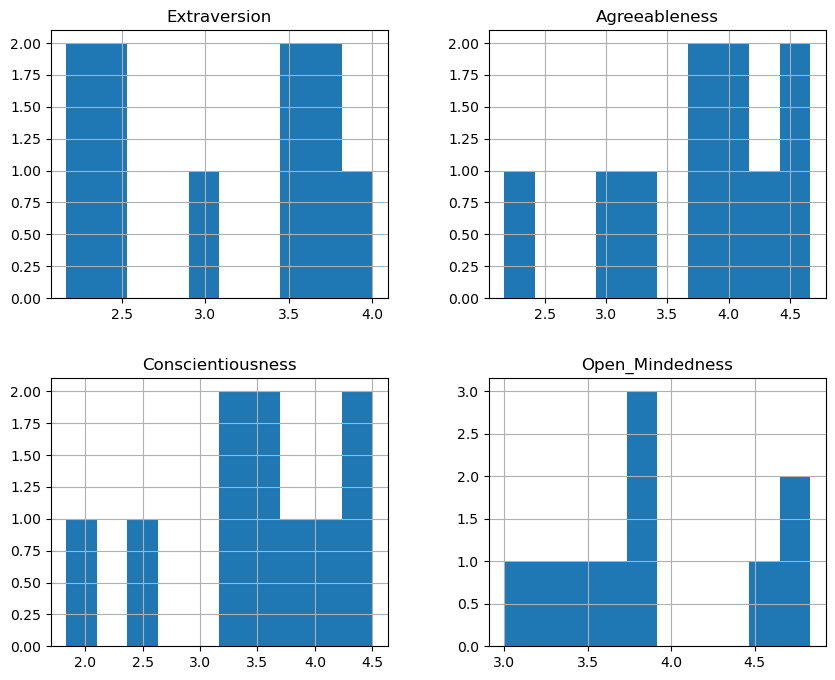

In [21]:
df_final.hist(figsize=(10,8))

In [22]:
df_final.corr()

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness
Extraversion,1.000000,0.211474,0.535797,-0.266524
Agreeableness,0.211474,1.000000,-0.064595,-0.151956
Conscientiousness,0.535797,-0.064595,1.000000,-0.384118
Open_Mindedness,-0.266524,-0.151956,-0.384118,1.000000


# Direct categorization

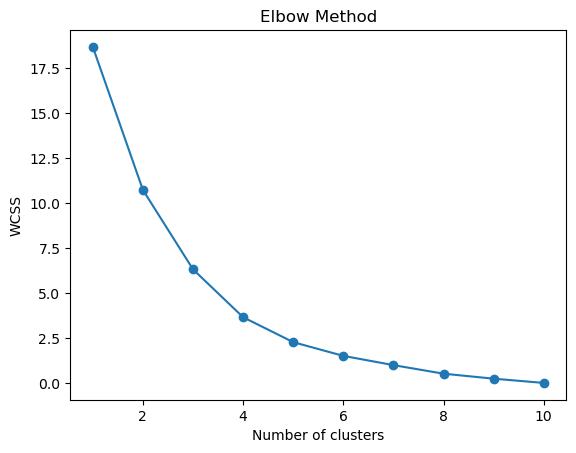

In [23]:
wcss = []
for i in range(1, 11):  # Check for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of distances of samples to their closest cluster center

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2, the average silhouette_score is: 0.341549734619288
For n_clusters = 3, the average silhouette_score is: 0.41177713641731434
For n_clusters = 4, the average silhouette_score is: 0.398770342054135


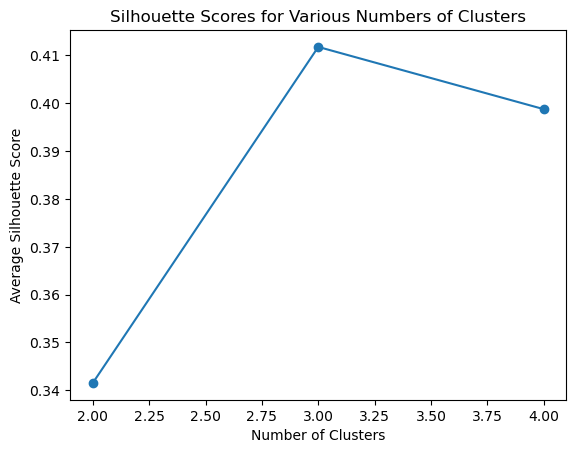

In [24]:
# Sample DataFrame 'df_final' containing your data

silhouette_scores = []
range_n_clusters = range(2, 5) 
num_trial = 15
silhouette_scores_trial = []
silhouette_best = 0
best_index = 0

for n_clusters in range_n_clusters:
    for i in range(num_trial):
        kmeans = KMeans(n_clusters=n_clusters)
        cluster_labels = kmeans.fit_predict(df_final)
        silhouette_avg = silhouette_score(df_final, cluster_labels)
        silhouette_scores_trial.append(silhouette_avg)
        if silhouette_avg > silhouette_best:
            best_index = i
    
    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_scores_trial[best_index]
    silhouette_scores.append(silhouette_avg)
    
    # reset
    silhouette_scores_trial = []
    best_index = 0
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")


# Plotting the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.show()

In [25]:
df_final.head()

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness
0,2.166667,3.333333,3.500000,3.833333
1,3.500000,3.833333,3.833333,3.833333
2,3.000000,4.666667,4.500000,3.333333
3,2.500000,2.166667,3.333333,3.666667
4,2.500000,3.833333,2.500000,4.833333


In [26]:
def fit_kmean(k, df):
    # K-means clustering
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(df)

    df_with_clusters = df_final.copy()
    df_with_clusters['Cluster'] = clusters

    return clusters, kmeans, df_with_clusters

In [27]:
def assess_kmean (df):
    X = df.iloc[:,:-1]
    X = sm.add_constant(X)
    y = df.iloc[:,-1]

    lr = sm.OLS(y, X)
    lr_result = lr.fit()

    summary = lr_result.summary()
    rsquared_adj = lr_result.rsquared_adj

    return summary, rsquared_adj

In [28]:
# Determining the range for k and initializing variables
k_range = range(2, 5)
trial = 10
best_k = 2
best_index = 0
df_cluster_list = []
model_list = []
clusters_list = []
final_summary = None

# Introducing additional metrics for a more comprehensive evaluation
best_silhouette_score = -1
best_davies_bouldin_score = float('inf')

# Set the prioritized benchmark here: 'silhouette' or 'davies_bouldin'
prioritized_benchmark = 'silhouette'

for k in k_range:
    for i in range(trial):
        # Trying different clustering techniques with hyperparameter tuning
        if i % 3 == 0:
            # Hyperparameters for KMeans
            init_methods = ['k-means++', 'random']
            n_init = 10 if i < 5 else 20  # More initializations for later trials
            model = KMeans(n_clusters=k, init=init_methods[i % 2], n_init=n_init)
            model_name = "KMeans"
        elif i % 3 == 1:
            # Hyperparameters for AgglomerativeClustering
            linkage_methods = ['ward', 'complete', 'average', 'single']
            model = AgglomerativeClustering(n_clusters=k, linkage=linkage_methods[i % 4])
            model_name = "AgglomerativeClustering"
        else:
            # Hyperparameters for DBSCAN
            eps_values = [0.3, 0.5, 0.7]
            min_samples_values = [5, 10, 15]
            model = DBSCAN(eps=eps_values[i % 3], min_samples=min_samples_values[i // 3])
            model_name = "DBSCAN"
        
        clusters = model.fit_predict(df_final.iloc[:, :-1])
        
        # For DBSCAN, number of clusters may vary, redefine k based on unique labels
        if isinstance(model, DBSCAN):
            unique_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
            if unique_clusters < 2:
                print(f"Skipping silhouette score calculation for DBSCAN with {unique_clusters} clusters at trial {i}.")
                continue
        
        df_cluster = df_final.copy()
        df_cluster['Cluster'] = clusters
        
        df_cluster_list.append(df_cluster)
        model_list.append(model)
        clusters_list.append(clusters)
        
        # Assessing the clustering with multiple metrics
        silhouette_avg = silhouette_score(df_final.iloc[:, :-1], clusters)
        davies_bouldin_score_value = davies_bouldin_score(df_final.iloc[:, :-1], clusters)
        
        # Update best scores based on prioritized benchmark
        if prioritized_benchmark == 'silhouette':
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_davies_bouldin_score = davies_bouldin_score_value
                best_k = k
                best_index = len(df_cluster_list) - 1
                final_summary = f"Best model at trial {i}, k={k} with silhouette score: {silhouette_avg}, using {model_name}"
            elif silhouette_avg == best_silhouette_score:
                if davies_bouldin_score_value < best_davies_bouldin_score:
                    best_davies_bouldin_score = davies_bouldin_score_value
                    best_k = k
                    best_index = len(df_cluster_list) - 1
                    final_summary = f"Best model at trial {i}, k={k} with silhouette score: {silhouette_avg} and better Davies-Bouldin score: {davies_bouldin_score_value}, using {model_name}"
        elif prioritized_benchmark == 'davies_bouldin':
            if davies_bouldin_score_value < best_davies_bouldin_score:
                best_davies_bouldin_score = davies_bouldin_score_value
                best_silhouette_score = silhouette_avg
                best_k = k
                best_index = len(df_cluster_list) - 1
                final_summary = f"Best model at trial {i}, k={k} with Davies-Bouldin score: {davies_bouldin_score_value}, using {model_name}"
            elif davies_bouldin_score_value == best_davies_bouldin_score:
                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_k = k
                    best_index = len(df_cluster_list) - 1
                    final_summary = f"Best model at trial {i}, k={k} with Davies-Bouldin score: {davies_bouldin_score_value} and better silhouette score: {silhouette_avg}, using {model_name}"
        
        print(f"Trial {i}, k={k} done with silhouette score = {silhouette_avg}, Davies-Bouldin score = {davies_bouldin_score_value}.")




Trial 0, k=2 done with silhouette score = 0.4024045003243411, Davies-Bouldin score = 0.9475582313777876.
Trial 1, k=2 done with silhouette score = 0.4024045003243411, Davies-Bouldin score = 0.9475582313777876.
Skipping silhouette score calculation for DBSCAN with 0 clusters at trial 2.
Trial 3, k=2 done with silhouette score = 0.4024045003243411, Davies-Bouldin score = 0.9475582313777876.
Trial 4, k=2 done with silhouette score = 0.4024045003243411, Davies-Bouldin score = 0.9475582313777876.
Skipping silhouette score calculation for DBSCAN with 0 clusters at trial 5.
Trial 6, k=2 done with silhouette score = 0.4024045003243411, Davies-Bouldin score = 0.9475582313777876.
Trial 7, k=2 done with silhouette score = 0.4024045003243411, Davies-Bouldin score = 0.9475582313777876.
Skipping silhouette score calculation for DBSCAN with 0 clusters at trial 8.
Trial 9, k=2 done with silhouette score = 0.4024045003243411, Davies-Bouldin score = 0.9475582313777876.
Trial 0, k=3 done with silhouette 

Best model at trial 0, k=3 with silhouette score: 0.45868731040222255, using KMeans


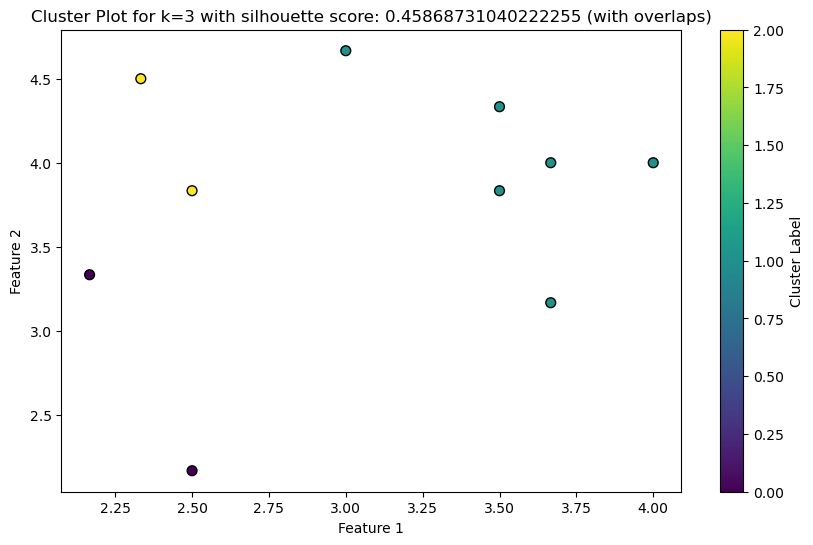

In [29]:
# show interim result
df_cluster = df_cluster_list[best_index]
model = model_list[best_index]
clusters = clusters_list[best_index]
print(final_summary)

# Plotting all samples with different colors for each cluster
plt.figure(figsize=(10, 6))
plt.scatter(df_cluster.iloc[:, 0], df_cluster.iloc[:, 1], c=df_cluster['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title(f'Cluster Plot for k={best_k} with silhouette score: {best_silhouette_score} (with overlaps)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [30]:
df_cluster_group = df_cluster.iloc[:,:6].groupby('Cluster').mean()
df_cluster_group

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness
Cluster,,,,
0,2.333333,2.750000,3.416667,3.750000
1,3.555556,4.000000,3.972222,3.722222
2,2.416667,4.166667,2.166667,4.666667


In [31]:
df_cluster['Cluster'].value_counts()

Cluster
1    6
0    2
2    2
Name: count, dtype: int64

In [32]:
df_cluster.insert(0, 'ResponseId', original_df['ResponseId'])
df_cluster

,ResponseId,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness,Cluster
0,5e49c48fac17f4000c1bfcbc,2.166667,3.333333,3.500000,3.833333,0
1,5f38251e3cec500d267efb92,3.500000,3.833333,3.833333,3.833333,1
2,5cd043b25b04850017e5d028,3.000000,4.666667,4.500000,3.333333,1
3,63d37e4ea0985c4dc486ff8e,2.500000,2.166667,3.333333,3.666667,0
4,6565fff05ec125a5ff77a77c,2.500000,3.833333,2.500000,4.833333,2
5,6146eadbe88132805e5e3139,3.500000,4.333333,4.166667,3.500000,1
6,5b987c55bb32a600018302dc,2.333333,4.500000,1.833333,4.500000,2
7,5f00b44e836b900755d6da5c,3.666667,3.166667,4.500000,4.833333,1
8,60f5569b3a95a18a91dc5d21,4.000000,4.000000,3.333333,3.833333,1
9,641c2b936dc70fab01d77dc6,3.666667,4.000000,3.500000,3.000000,1


In [33]:
df_cluster.isna().sum()

ResponseId           0
Extraversion         0
Agreeableness        0
Conscientiousness    0
Open_Mindedness      0
Cluster              0
dtype: int64

In [34]:
df_cluster_group

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness
Cluster,,,,
0,2.333333,2.750000,3.416667,3.750000
1,3.555556,4.000000,3.972222,3.722222
2,2.416667,4.166667,2.166667,4.666667


In [35]:
# 5 = max possible score in big five trait test
df_cluster_group_reversed = (5 + 1) -  df_cluster_group
df_cluster_group_reversed

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness
Cluster,,,,
0,3.666667,3.250000,2.583333,2.250000
1,2.444444,2.000000,2.027778,2.277778
2,3.583333,1.833333,3.833333,1.333333
